In [1]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1
# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True


In [2]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation



In [3]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

In [4]:
# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [5]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())



General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.4+ KB
None


In [6]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [7]:
print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.

### Description of the Data: Let's understand what the variables are. 
- **Crim:** Crime rate

- **Zn:** Percent of land zoned for lots

- **Indus:** Percent of business that is industrial or nonretail

- **Chas:** On the Charles River (1) or not (0)

- **Nox:** Air pollution (nitrogen oxide concentration)

- **Rooms:** Average number of rooms per home

- **Age:** Percentage of homes built before 1940

- **Dis:** Weighted distance to employment centers

- **Rad:** Accessibility to radial highways

- **Tax:** Tax rate

- **PRatio:** Pupil/teacher ratio in public schools

- **Lstat:** Percentage of population of lower socio-economic status

- **MV:**  Median value of homes in thousands of 1970 dollars

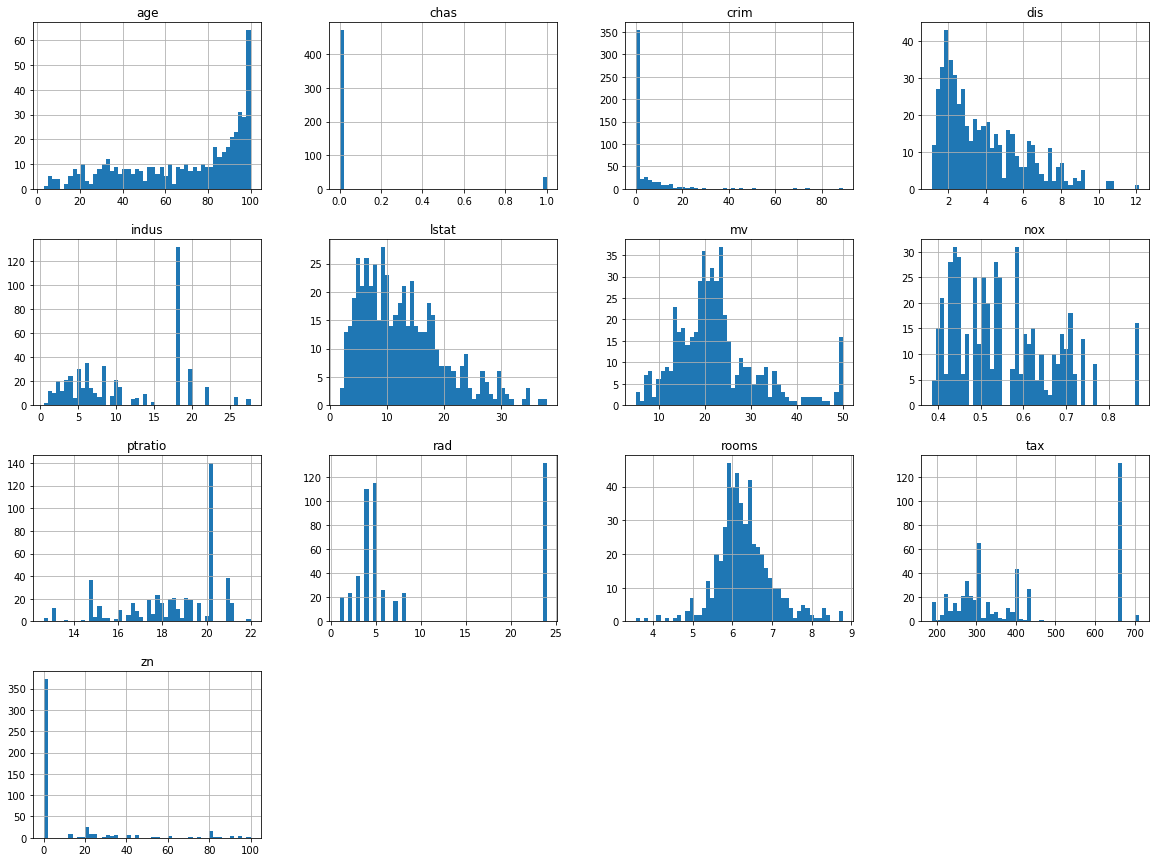

In [8]:
boston.hist(bins=50, figsize=(20,15))
plt.show()

- **Median Value:** Median Value is expressed in 1970 thousands of dollars. It seems to be around the 20,000s value. However, it seems like the data was capped at 50,000. MedianValue of Home is skewed right
- We can appreciate that a handful of the attributes are tail heavy. We can try transforming these attributes and get them ready for our model. 
- Interesting double hump for 1) distance to radial highways and 2) tax rate. 
- It could be worth making that a categorical variables in our analysis dividing the two different populations.



In [9]:
#Since Median housing value is the target variable. Lets explore it further and see its correlation with other variables. 
corr_matrix = boston.corr()
corr_matrix['mv'].sort_values(ascending=False)

mv         1.000000
rooms      0.696304
zn         0.360386
dis        0.249315
chas       0.175663
age       -0.377999
rad       -0.384766
crim      -0.389582
nox       -0.429300
tax       -0.471979
indus     -0.484754
ptratio   -0.505655
lstat     -0.740836
Name: mv, dtype: float64

This makes sense from a logic point of view. The bigger the house/the higher the number of rooms, the higher the median value should be. The quality of education is also a factor that affects the median value of a house. The more pupils a teacher has, the lower the value of a house. 

- High negative correlation with % of population in lower socioeconomic class
- Neg corr with crime rate, air polution, average age of home, accessibility to highways, tax rate, pupil to teacher ratio
- Pos corr with % of land zoned for lots and distance to employment centers
- Looking like suburban areas (higher distance to employement centers, more land zoned for lots, lower accessibility to radial highways are desirable


In [10]:
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25)      

np.set_printoptions(precision=3)

<Figure size 432x288 with 0 Axes>

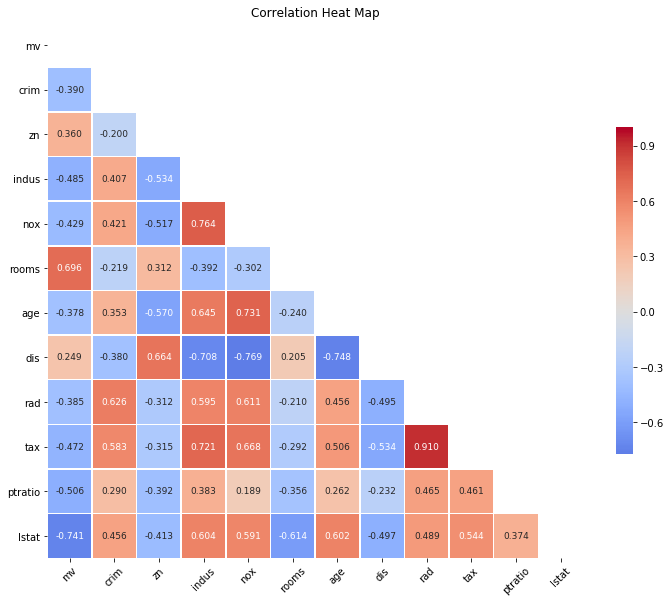

In [11]:
non_bin = ["mv", "crim", "zn", "indus", "nox", "rooms", "age", "dis", "rad", "tax", "ptratio", "lstat"]
corr_chart(df_corr = boston[non_bin]) 

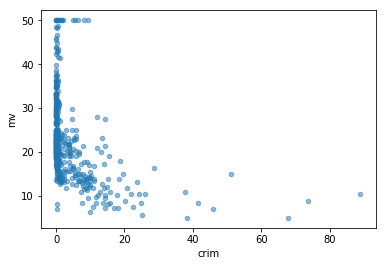

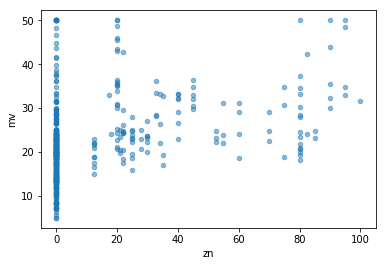

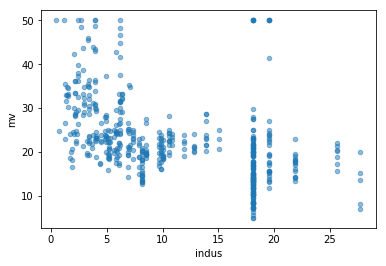

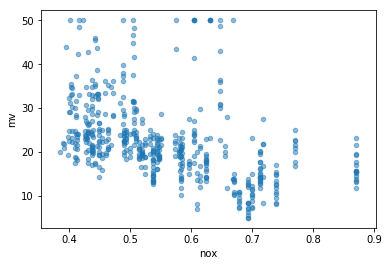

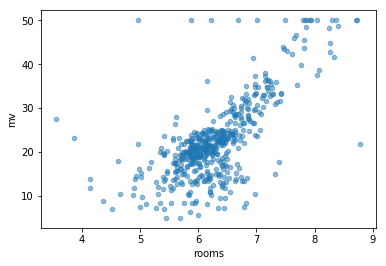

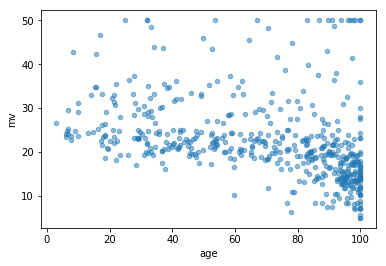

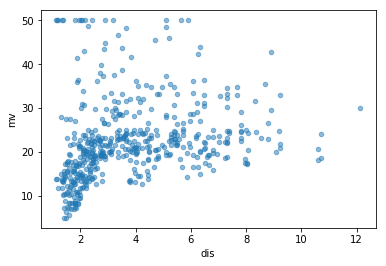

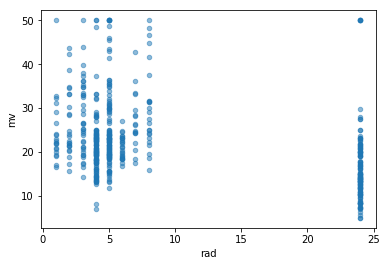

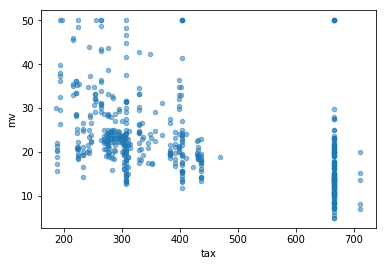

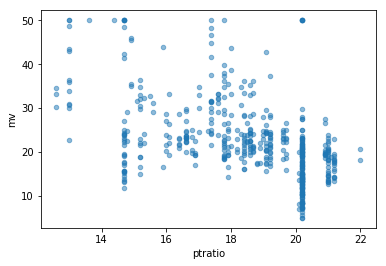

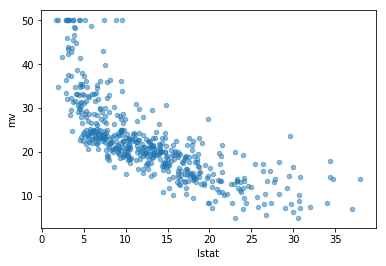

In [12]:
attributes = ['crim', 'zn','indus','nox','rooms','age','dis','rad','tax','ptratio','lstat']

for att in attributes:
    boston.plot(kind='scatter',x=att,y='mv',alpha=0.5)
    

In [13]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [14]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [15]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [16]:
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

[2.253e+01 3.614e+00 1.136e+01 1.114e+01 6.917e-02 5.547e-01 6.285e+00
 6.857e+01 3.795e+00 9.549e+00 4.082e+02 1.846e+01 1.265e+01]
[9.173e+00 8.593e+00 2.330e+01 6.854e+00 2.537e-01 1.158e-01 7.019e-01
 2.812e+01 2.104e+00 8.699e+00 1.684e+02 2.163e+00 7.134e+00]


In [17]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

In [18]:
#Converting Standardized values back to data frame
model_dataframe = pd.DataFrame(model_data)
my_columns = ["mv", "crim", "zn", "indus", "chas", "nox", "rooms", "age", "dis", "rad", "tax", "ptratio", "lstat"]
model_dataframe.columns = my_columns

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Text xticklabel objects>)

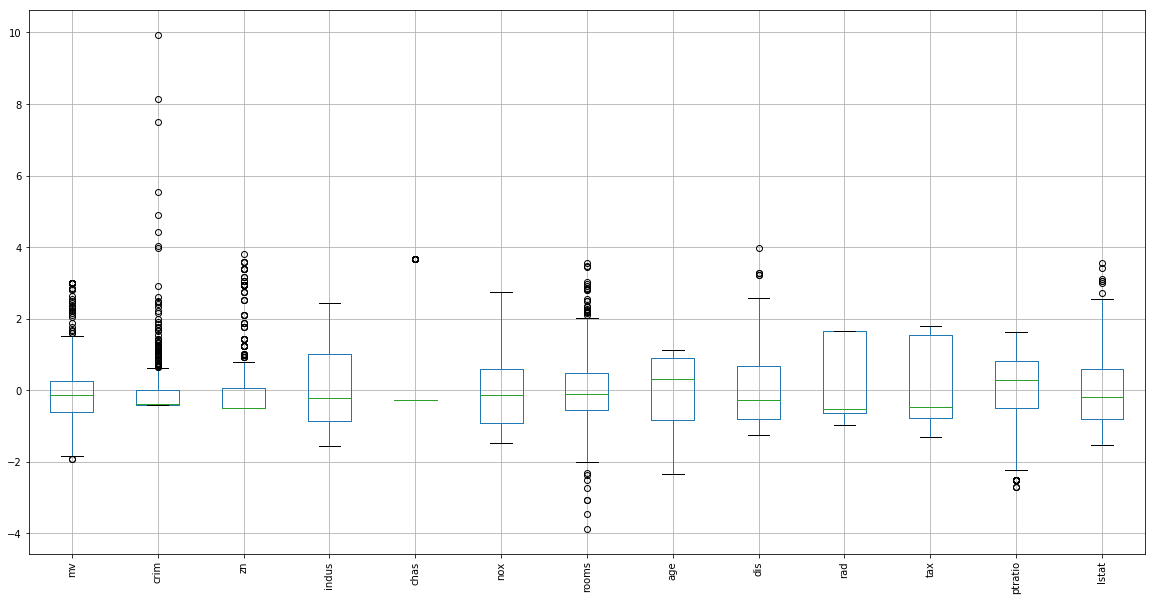

In [19]:
#Used boxplots on standardized values to see where there were many outliers (i.e. crime rate)

boxplot = model_dataframe.boxplot(figsize=(20,10))
plt.savefig('Boxplot-r.pdf',
           bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b')
plt.xticks(rotation='vertical')

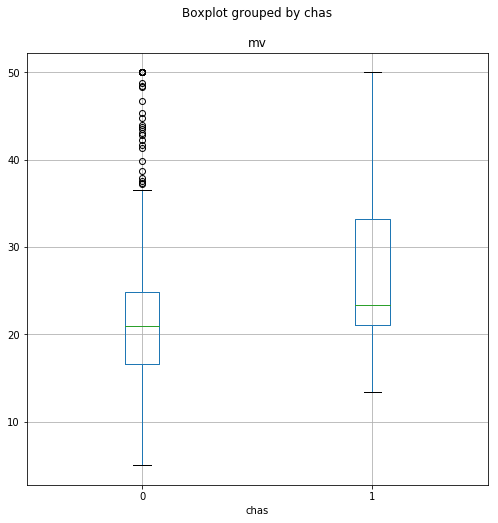

In [20]:
#Home on the Charles river are more pricy, though there are many expensive homes not on the Charles River. 
#What do those homes have in common?

boston.boxplot(column="mv",        # Column to plot
                 by= "chas",         # Column to split upon
                 figsize= (8,8))        # Figure size

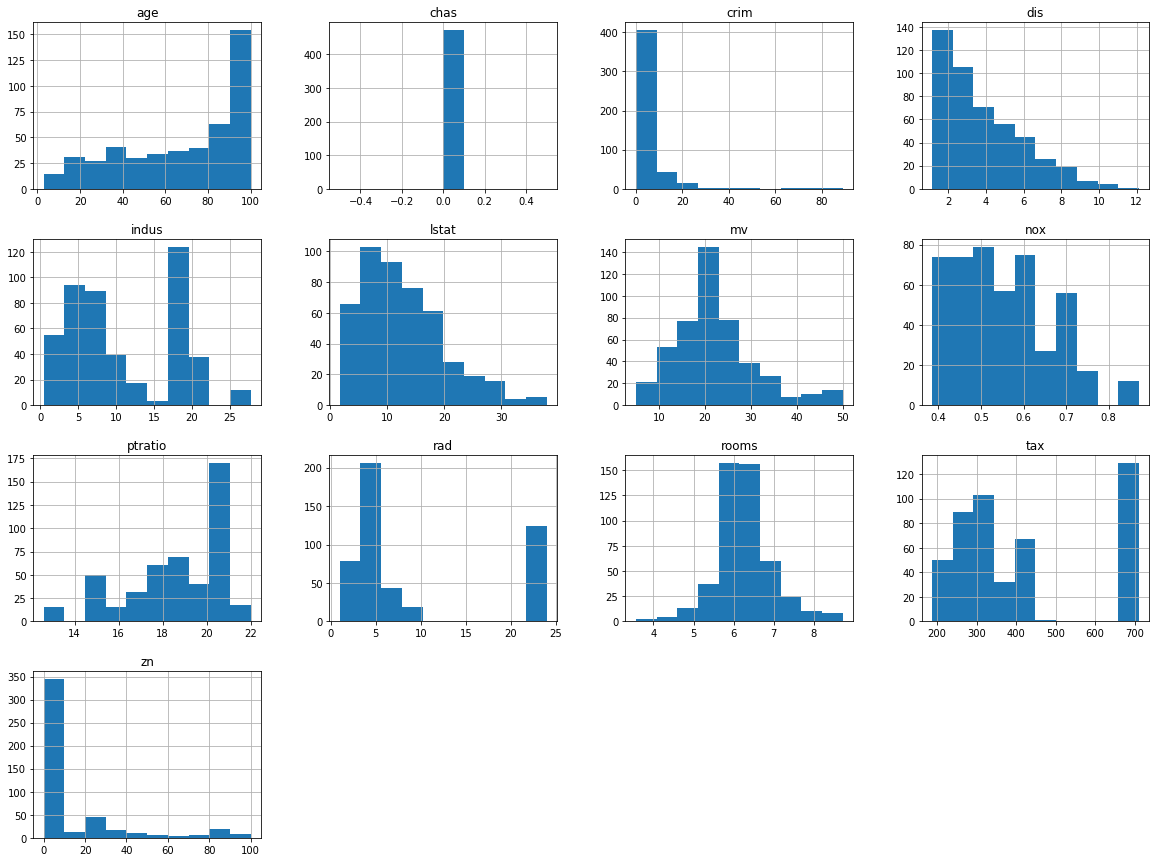

In [21]:
###Exploring the outlier home values not by the Charles River. 
boston_noncharles = boston[boston['chas'] < .5] #Subset of homes not on Charles River
#histogram = boston_noncharles['mv'].hist(grid= True, bins=10, figsize=(20,15)) 
boston_noncharles_exp = boston[(boston['chas'] < .5) & ((boston['mv'] > 40))]
histogram = boston_noncharles.hist(grid= True, bins=10, figsize=(20,15))

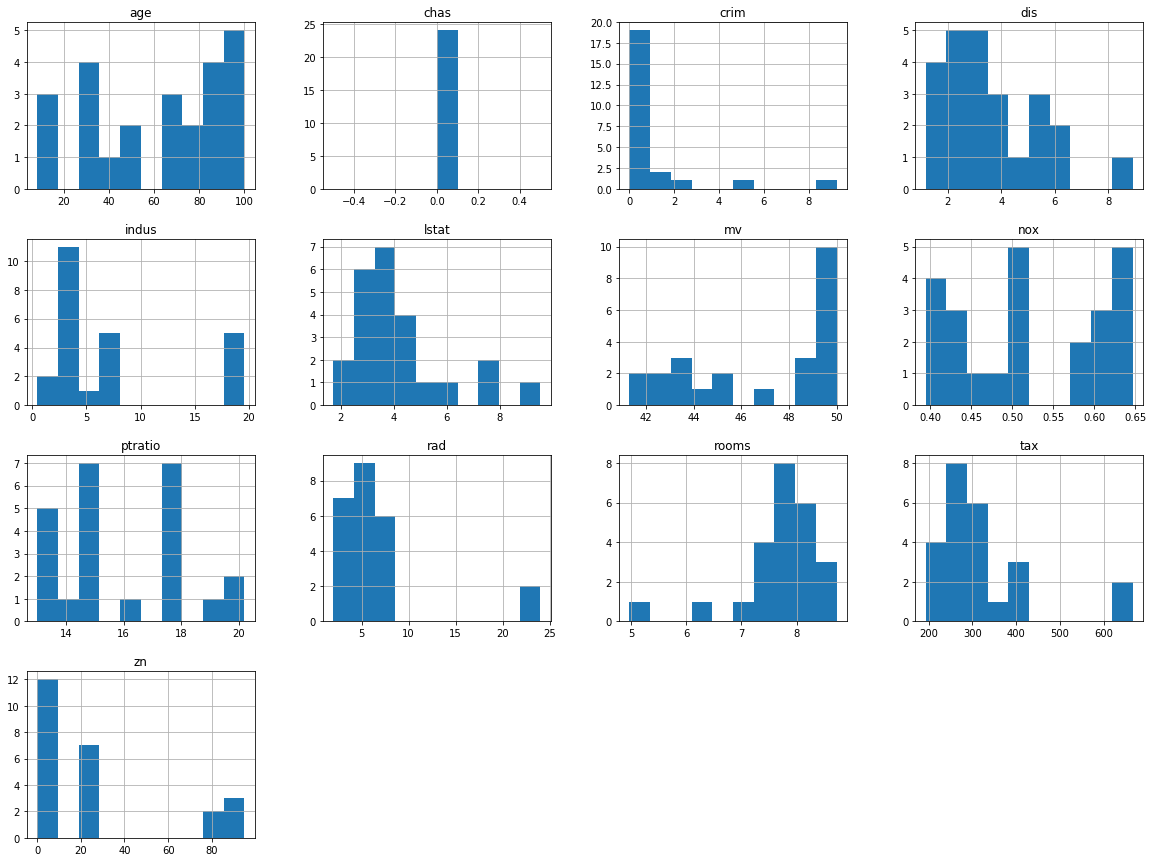

In [22]:
histogram = boston_noncharles_exp.hist(grid= True, bins=10, figsize=(20,15))

- Found that this set of homes were much bigger, further from highways, newer
- Looks like outlier homes are > 40K in 1970 dollars


In [23]:
# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


In [24]:
boston.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [25]:
from sklearn.model_selection import train_test_split 

In [26]:
X_model = model_data[:, 0:model_data.shape[1]-1]
mv_model = model_data[:, model_data.shape[1]-1]
print(X_model.shape)
print(mv_model.shape)

(506, 12)
(506,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_model, mv_model, test_size= .2, random_state=RANDOM_SEED)
print (len(X_train), len(X_test))

404 102


In [28]:
comp_columns = ["Model", 'RMSE', 'MSE', 'Score']
comp = pd.DataFrame(columns = comp_columns)


In [29]:
#For loop to run the performance testing
def perf_test(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    score = model.score(X_test, y_test) 
    plt.scatter(y_test, y_pred)
    plt.title(name)
    
    plt.show()
    return rmse, mse, score

In [30]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform as sp_rand

In [31]:
alphas = np.array([1000, 100, 10, 1,0.1,0.01,0.001,0.0001,0])
model = Ridge()
rsearch = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv =5)
rsearch.fit(X_train, y_train)
ralpha = rsearch.best_estimator_.alpha
ralpha

10.0

In [32]:
alphas = np.array([1000, 100, 10, 1,0.1,0.01,0.001,0.0001])
model = Lasso()
lsearch = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv =5)
lsearch.fit(X_train, y_train)
lalpha = lsearch.best_estimator_.alpha
lalpha

0.0001

In [33]:
alphas = np.array([1000, 100, 10, 1,0.1,0.01,0.001,0.0001])
model = ElasticNet()
esearch = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv =5)
esearch.fit(X_train, y_train)
ealpha = esearch.best_estimator_.alpha
ealpha

0.001

In [34]:
names = ['LinReg',
         'Ridge',
         'Lasso',
         'ElasticNet']
models = [LinearRegression(),
          Ridge(alpha=ralpha),        
          Lasso(alpha=lalpha),
          ElasticNet(alpha=ealpha)]

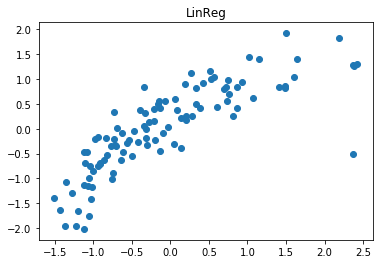

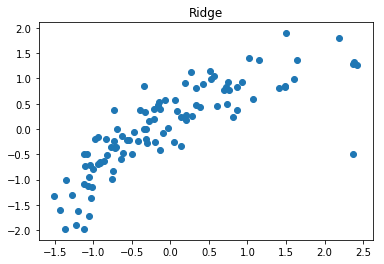

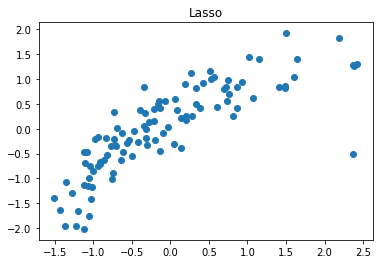

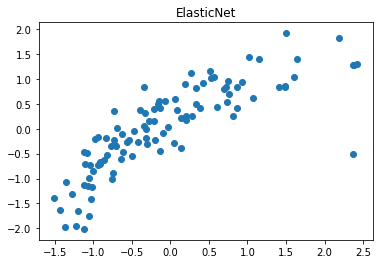

In [35]:
comp = []
for name, model in zip(names,models):
    rmse, mse, score = perf_test(name, model, X_train, y_train, X_test, y_test )
    result = (name, rmse, mse, score)
    comp.append(result)

In [36]:
comp = pd.DataFrame(np.array(comp).reshape(len(comp),4), columns = ('Model', 'RMSE', 'MSE', 'Score'))
comp[['RMSE', 'MSE', 'Score']]= comp[['RMSE', 'MSE', 'Score']].apply(pd.to_numeric)


In [37]:
comp.sort_values(by = "RMSE").round(4)

,Model,RMSE,MSE,Score
1,Ridge,0.5591,0.3126,0.6572
3,ElasticNet,0.5625,0.3164,0.6530
2,Lasso,0.5630,0.3169,0.6525
0,LinReg,0.5630,0.3170,0.6524


The score from Linear Regression to Ridge Regression improved very minimally. This leads us to believe that perhaps we are overfitting the data. Since we would like to generalize, we want to make the model less complex. Therefore a **Ridge Regression  model with alpha of 100** is preferable to a Linear Regression.

## Less Variables

Removing ZN and DIS from the variable list due to their lower correlations to MV.

In [38]:

new_prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [39]:
print('\nData dimensions:', new_prelim_model_data.shape)


Data dimensions: (506, 11)


In [40]:
new_scaler = StandardScaler()
print(new_scaler.fit(new_prelim_model_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [41]:
print(new_scaler.mean_)
print(new_scaler.scale_)

[2.253e+01 3.614e+00 1.114e+01 6.917e-02 5.547e-01 6.285e+00 6.857e+01
 9.549e+00 4.082e+02 1.846e+01 1.265e+01]
[9.173e+00 8.593e+00 6.854e+00 2.537e-01 1.158e-01 7.019e-01 2.812e+01
 8.699e+00 1.684e+02 2.163e+00 7.134e+00]


In [42]:
# the model data will be standardized form of preliminary model data
new_model_data = scaler.fit_transform(new_prelim_model_data)

In [43]:
new_model_dataframe = pd.DataFrame(new_model_data)
new_mv_columns = ["mv", "crim", "indus", "chas","nox", "rooms", "age", "rad", "tax", "ptratio", "lstat"]

new_model_dataframe.columns = new_mv_columns

In [44]:
new_X_model = new_model_data[:, 0:new_model_data.shape[1]-1]
new_mv_model = new_model_data[:, new_model_data.shape[1]-1]
print(new_X_model.shape)
print(new_mv_model.shape)

(506, 10)
(506,)


In [45]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(new_X_model, new_mv_model, test_size= .2, random_state=RANDOM_SEED)
print (len(X_train2), len(X_test2))


404 102


In [46]:
names2 = ['LV_LinReg',
         'LV_Ridge',
         'LV_Lasso',
         'LV_ElasticNet']
models2 = [LinearRegression(),
          Ridge(alpha=ralpha),        
          Lasso(alpha=lalpha),
          ElasticNet(alpha=ealpha)]

In [47]:
alphas = np.array([1000, 100, 10, 1,0.1,0.01,0.001,0.0001,0])
model = Ridge()
rsearch2 = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv =5)
rsearch2.fit(X_train2, y_train2)
ralpha2 = rsearch2.best_estimator_.alpha
ralpha2

10.0

In [48]:
alphas = np.array([1000, 100, 10, 1,0.1,0.01,0.001,0.0001])
model = Lasso()
lsearch2 = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv =5)
lsearch2.fit(X_train2, y_train2)
lalpha2 = lsearch2.best_estimator_.alpha
lalpha2

0.01

In [49]:
alphas = np.array([1000, 100, 10, 1,0.1,0.01,0.001,0.0001])
model = ElasticNet()
esearch2 = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv =5)
esearch2.fit(X_train2, y_train2)
ealpha2 = esearch2.best_estimator_.alpha
ealpha2

0.01

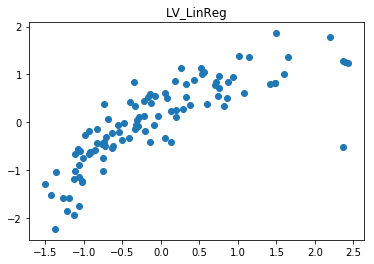

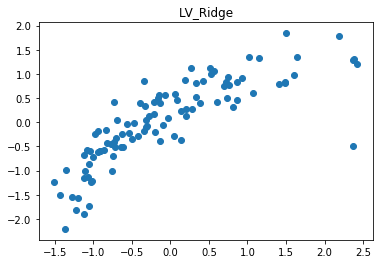

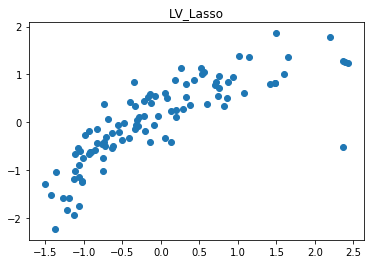

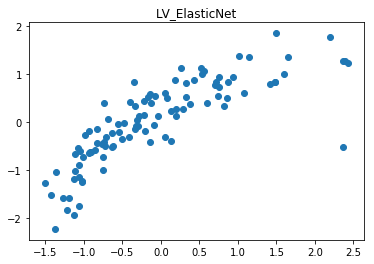

In [50]:
#Run perf_test with the new train and test sets.
new_comp = []
for name, model in zip(names2,models2):
    rmse, mse, score = perf_test(name, model, X_train2, y_train2, X_test2, y_test2 )
    result2 = (name, rmse, mse, score)
    new_comp.append(result2)

In [51]:
new_comp = pd.DataFrame(np.array(new_comp).reshape(len(new_comp),4), columns = ('Model', 'RMSE', 'MSE', 'Score'))

In [52]:
new_comp[['RMSE', 'MSE', 'Score']]= new_comp[['RMSE', 'MSE', 'Score']].apply(pd.to_numeric)

new_comp.sort_values(by = "RMSE").round(4)

,Model,RMSE,MSE,Score
1,LV_Ridge,0.5615,0.3153,0.6543
3,LV_ElasticNet,0.5641,0.3183,0.6510
2,LV_Lasso,0.5644,0.3185,0.6507
0,LV_LinReg,0.5644,0.3186,0.6507


## Perform KFolds


In [53]:
from sklearn.model_selection import KFold

In [54]:
def perf_test_noplot(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    score = model.score(X_test, y_test) 

    return rmse, mse, score



In [55]:
names3 = ['K_LinReg',
         'K_Ridge',
         'K_Lasso',
         'K_ElasticNet']
models3 = [LinearRegression(),
          Ridge(alpha=ralpha),        
          Lasso(alpha=lalpha),
          ElasticNet(alpha=ealpha)]

In [56]:

folds = 10
kfcomp = []  
kf = KFold(n_splits = folds, shuffle=False, random_state = RANDOM_SEED)


fold_index = 0
for train_index, test_index in kf.split(model_data):    
    X_trainkf = model_data[train_index, 0:model_data.shape[1]-1] #model_data[train_index, 0:3]
    X_testkf = model_data[test_index, 0:model_data.shape[1]-1] #model_data[test_index, 0:3]
    y_trainkf = model_data[train_index, model_data.shape[1]-1]
    y_testkf = model_data[test_index, model_data.shape[1]-1]
    
     
    for name, model in zip(names3, models3):
        rmse, mse, score = perf_test_noplot(name, model, X_trainkf, y_trainkf, X_testkf, y_testkf)
        resultkf = (name, rmse, mse, score)
        kfcomp.append(resultkf)
        
    fold_index += 1

kfcomp = pd.DataFrame(np.array(kfcomp).reshape(len(kfcomp),4), columns = ('Model', 'RMSE', 'MSE', 'Score'))
kfcomp[['RMSE', 'MSE', 'Score']]= kfcomp[['RMSE', 'MSE', 'Score']].apply(pd.to_numeric)
kfcomp_mean = kfcomp.groupby('Model', axis=0).mean().reset_index()
#print(kfcomp_mean.sort_values(by = "RMSE", ascending = False))

kfcomp = kfcomp_mean.sort_values(by= "RMSE")
kfcomp

,Model,RMSE,MSE,Score
3,K_Ridge,0.578408,0.356762,0.242903
0,K_ElasticNet,0.581916,0.359712,0.227310
1,K_Lasso,0.582556,0.360282,0.224599
2,K_LinReg,0.582659,0.360360,0.224100


In [57]:
names4 = ['KLV_LinReg',
         'KLV_Ridge',
         'KLV_Lasso',
         'KLV_ElasticNet']
models4 = [LinearRegression(),
          Ridge(alpha=ralpha2),        
          Lasso(alpha=lalpha2),
          ElasticNet(alpha=ealpha2)]

In [58]:
folds = 10
lvkfcomp = []  
kf = KFold(n_splits = folds, shuffle=False, random_state = RANDOM_SEED)


fold_index = 0
for train_index, test_index in kf.split(model_data):    
    X_trainlv = new_model_data[train_index, 0:new_model_data.shape[1]-1] #model_data[train_index, 0:3]
    X_testlv = new_model_data[test_index, 0:new_model_data.shape[1]-1] #model_data[test_index, 0:3]
    y_trainlv = new_model_data[train_index, new_model_data.shape[1]-1]
    y_testlv = new_model_data[test_index, new_model_data.shape[1]-1]
    
     
    for name, model in zip(names4, models4):
        rmse, mse, score = perf_test_noplot(name, model, X_trainlv, y_trainlv, X_testlv, y_testlv)
        resultlv = (name, rmse, mse, score)
        lvkfcomp.append(resultlv)
        
    fold_index += 1

lvkfcomp = pd.DataFrame(np.array(lvkfcomp).reshape(len(lvkfcomp),4), columns = ('Model', 'RMSE', 'MSE', 'Score'))
lvkfcomp[['RMSE', 'MSE', 'Score']]= lvkfcomp[['RMSE', 'MSE', 'Score']].apply(pd.to_numeric)
lvkfcomp_mean = lvkfcomp.groupby('Model', axis=0).mean().reset_index()
#print(kfcomp_mean.sort_values(by = "RMSE", ascending = False))
lvkfcomp = lvkfcomp_mean.sort_values(by="RMSE")
lvkfcomp

,Model,RMSE,MSE,Score
1,KLV_Lasso,0.574940,0.351947,0.238197
0,KLV_ElasticNet,0.576019,0.353558,0.235782
3,KLV_Ridge,0.578150,0.356529,0.232106
2,KLV_LinReg,0.581591,0.359615,0.215367


In [59]:
pd.concat([lvkfcomp, kfcomp, new_comp, comp]).sort_values(by="RMSE") 

,Model,RMSE,MSE,Score
1,Ridge,0.559077,0.312567,0.657245
1,LV_Ridge,0.561481,0.315261,0.654292
3,ElasticNet,0.562507,0.316414,0.653027
2,Lasso,0.562950,0.316913,0.652480
0,LinReg,0.563042,0.317017,0.652366
3,LV_ElasticNet,0.564139,0.318253,0.651011
2,LV_Lasso,0.564379,0.318524,0.650714
0,LV_LinReg,0.564425,0.318575,0.650657
1,KLV_Lasso,0.574940,0.351947,0.238197
0,KLV_ElasticNet,0.576019,0.353558,0.235782


Decision Tree Regression

C:\Users\Himalaya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


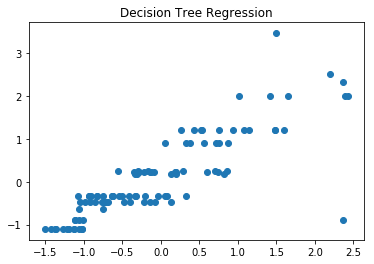

In [65]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor


#Code for GridSearch on multiple regressors
'''
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)
'''

#Variables from cross validation above: X_train, X_test, y_train, y_test = train_test_split(X_model, mv_model, test_size= .2, random_state=RANDOM_SEED) 
param_grid = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}] 
tree = DecisionTreeRegressor() 
tsearch = GridSearchCV(tree, param_grid, cv =5, scoring='neg_mean_squared_error', return_train_score=True) 
tsearch.fit(X_train, y_train) 
talpha = tsearch.best_estimator_.max_depth 
talpha
#got result of 4
rmse, mse, score = perf_test("Decision Tree Regression", DecisionTreeRegressor(max_depth = 4), X_train, y_train, X_test, y_test ) 
result = ("Decision Tree Regression", rmse, mse, score) 
dtr_comp = pd.DataFrame(np.array(result).reshape(1,len(result)), columns = ('Model', 'RMSE', 'MSE', 'Score'))
dtr_comp[['RMSE', 'MSE', 'Score']]= dtr_comp[['RMSE', 'MSE', 'Score']].apply(pd.to_numeric)

#isinstance(dtr_comp, pd.DataFrame)

In [66]:
pd.concat([lvkfcomp, kfcomp, new_comp, comp, dtr_comp]).sort_values(by="RMSE") 

,Model,RMSE,MSE,Score
0,Decision Tree Regression,0.554897,0.307910,0.662352
1,Ridge,0.559077,0.312567,0.657245
1,LV_Ridge,0.561481,0.315261,0.654292
3,ElasticNet,0.562507,0.316414,0.653027
2,Lasso,0.562950,0.316913,0.652480
0,LinReg,0.563042,0.317017,0.652366
3,LV_ElasticNet,0.564139,0.318253,0.651011
2,LV_Lasso,0.564379,0.318524,0.650714
0,LV_LinReg,0.564425,0.318575,0.650657
1,KLV_Lasso,0.574940,0.351947,0.238197


Random Forest Regression

In [75]:
from sklearn.ensemble import RandomForestRegressor


##Started with a broad range of parameters and then fine tuned to get to good values. 
#Can control three main parameters for making predictions better: https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
param_grid = [
    {'n_estimators': [100,115,125,140], 'max_features': [7,8,9,10], 'min_samples_leaf': [1,5,10]}  ]

rnd_reg = RandomForestRegressor()
rfsearch = GridSearchCV(rnd_reg, param_grid, cv =5, scoring='neg_mean_squared_error', return_train_score=True) 
rfsearch.fit(X_train, y_train) 
rf_n_estimators = rfsearch.best_estimator_.n_estimators
rf_maxfeatures = rfsearch.best_estimator_.max_features
rf_min_samples = rfsearch.best_estimator_.min_samples_leaf

print(rf_n_estimators)
print(rf_maxfeatures)
print(rf_min_samples)

#Landed at 100 trees, 9 features max for each tree, and leaving at least one value in each leaf 


100
7
1


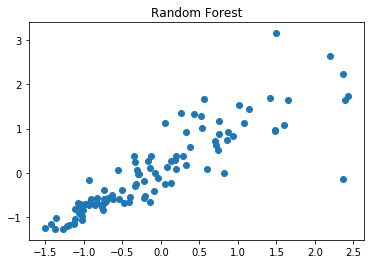

                      Model      RMSE       MSE     Score
0  Random Forest Regression  0.480617  0.230992  0.746699


In [78]:
rmse, mse, score = perf_test("Random Forest", RandomForestRegressor(n_estimators = 100, max_features = 9, min_samples_leaf = 1), X_train, y_train, X_test, y_test ) 
result = ("Random Forest Regression", rmse, mse, score) 
rf_comp = pd.DataFrame(np.array(result).reshape(1,len(result)), columns = ('Model', 'RMSE', 'MSE', 'Score'))
rf_comp[['RMSE', 'MSE', 'Score']]= rf_comp[['RMSE', 'MSE', 'Score']].apply(pd.to_numeric)
print(rf_comp)

In [79]:
pd.concat([lvkfcomp, kfcomp, new_comp, comp, dtr_comp, rf_comp]).sort_values(by="RMSE") 

,Model,RMSE,MSE,Score
0,Random Forest Regression,0.480617,0.230992,0.746699
0,Decision Tree Regression,0.554897,0.307910,0.662352
1,Ridge,0.559077,0.312567,0.657245
1,LV_Ridge,0.561481,0.315261,0.654292
3,ElasticNet,0.562507,0.316414,0.653027
2,Lasso,0.562950,0.316913,0.652480
0,LinReg,0.563042,0.317017,0.652366
3,LV_ElasticNet,0.564139,0.318253,0.651011
2,LV_Lasso,0.564379,0.318524,0.650714
0,LV_LinReg,0.564425,0.318575,0.650657
